In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import collections 
with open('startup_funding(2).csv', encoding ='UTF-8') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    dct ={}
    for row in file_data:
        year = row['Date'][-4:]
        if year in dct :
            dct[year] += 1
        else:
            dct[year] = 1

FileNotFoundError: [Errno 2] No such file or directory: 'startup_funding(2).csv'

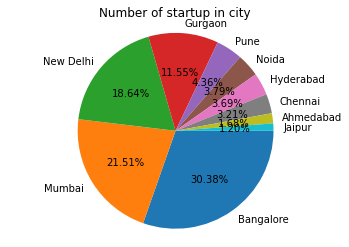

Bangalore 634
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"], inplace = True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity)
df[df['CityLocation']=='bangalore'] = 'Banglore'
df[df['CityLocation'] == 'Delhi'] = 'New Delhi'

city = df['CityLocation']
city= city.value_counts()[:10]
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%', counterclock = False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(city_name.shape[0]):
    print(city_name[i], no_of_str[i])



In [ ]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"], inplace = True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = []
